In [1]:
import acquire
import prep
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

acquire.py functions loaded successfully
prep.py functions loaded successfully
wrangle.py functions loaded successfully


After creating the Acquire and Prep files, I imported them to assess the data further

In [2]:
df = prep.prep_zillow_data()
df.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,propertylandusedesc,is_la_county,is_orange_county,is_ventura_county
0,14297519,261.000000,3.500000,4.000000,3.500000,3100.000000,3100.000000,6059.000000,3.000000,33634931.000000,-117869207.000000,4506.000000,122,60590630.072012,53571.000000,1286.000000,96978.000000,0.000000,1998.000000,485713.000000,1023282.000000,2016.000000,537569.000000,11013.720000,60590630072012.000000,0.025595,2017-01-01,Single Family Residential,0,1,0
1,17052889,261.000000,1.000000,2.000000,1.000000,1465.000000,1465.000000,6111.000000,1.000000,34449266.000000,-119281531.000000,12647.000000,1110,61110010.023006,13091.000000,2061.000000,97099.000000,5.000000,1967.000000,88000.000000,464000.000000,2016.000000,376000.000000,5672.480000,61110010023006.000000,0.055619,2017-01-01,Single Family Residential,0,0,1
2,14186244,261.000000,2.000000,3.000000,2.000000,1243.000000,1243.000000,6059.000000,2.000000,33886168.000000,-117823170.000000,8432.000000,122,60590218.022012,21412.000000,1286.000000,97078.000000,6.000000,1962.000000,85289.000000,564778.000000,2016.000000,479489.000000,6488.300000,60590218022012.000000,0.005383,2017-01-01,Single Family Residential,0,1,0
3,12177905,261.000000,3.000000,4.000000,3.000000,2376.000000,2376.000000,6037.000000,3.000000,34245180.000000,-118240722.000000,13038.000000,0101,60373001.001006,396551.000000,3101.000000,96330.000000,0.000000,1970.000000,108918.000000,145143.000000,2016.000000,36225.000000,1777.510000,60373001001006.000000,-0.103410,2017-01-01,Single Family Residential,1,0,0
4,10887214,266.000000,3.000000,3.000000,3.000000,1312.000000,1312.000000,6037.000000,3.000000,34185120.000000,-118414640.000000,278581.000000,010C,60371236.012000,12447.000000,3101.000000,96451.000000,0.000000,1964.000000,73681.000000,119407.000000,2016.000000,45726.000000,1533.890000,60371236012000.000000,0.006940,2017-01-01,Condominium,1,0,0


In [3]:
#Check for nulls in the data
df.isnull().sum().sort_values(ascending = False)

is_ventura_county               0
regionidcity                    0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcounty                  0
is_orange_county                0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
tdate                           0
propertylandusedesc             0
is_la_county  

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [5]:
df.shape

(75538, 31)

# Explore the Data

In [6]:
X_train.describe()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
count,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000,31725.000000
mean,261.988589,2.272656,3.044602,2.272704,1741.458797,6048.837541,2.205296,34008409.251505,-118201474.482427,30533.938631,96571.863128,1.500993,1968.701124,467521.202017,0.017180,0.651095,0.268873,0.080032
std,3.790895,0.872499,1.009816,0.872462,828.860765,20.694765,0.856940,266556.640894,358898.832066,131528.392810,2976.315180,2.838213,23.655378,519738.156024,0.166045,0.476631,0.443381,0.271346
min,246.000000,1.000000,1.000000,1.000000,242.000000,6037.000000,1.000000,33341224.000000,-119448392.000000,435.000000,95982.000000,0.000000,1824.000000,1000.000000,-2.317804,0.000000,0.000000,0.000000
25%,261.000000,2.000000,2.000000,2.000000,1180.000000,6037.000000,2.000000,33813927.000000,-118415320.000000,5937.000000,96193.000000,0.000000,1953.000000,206142.000000,-0.023959,0.000000,0.000000,0.000000
50%,261.000000,2.000000,3.000000,2.000000,1532.000000,6037.000000,2.000000,34021546.000000,-118178857.000000,7531.000000,96393.000000,0.000000,1970.000000,355336.000000,0.006386,1.000000,0.000000,0.000000
75%,266.000000,3.000000,4.000000,3.000000,2081.000000,6059.000000,3.000000,34175031.000000,-117925474.000000,21109.000000,96987.000000,0.000000,1987.000000,560306.000000,0.038625,1.000000,1.000000,0.000000
max,275.000000,5.500000,7.000000,5.500000,12616.000000,6111.000000,5.000000,34818767.000000,-117554636.000000,6971010.000000,399675.000000,13.000000,2016.000000,23858374.000000,3.123634,1.000000,1.000000,1.000000


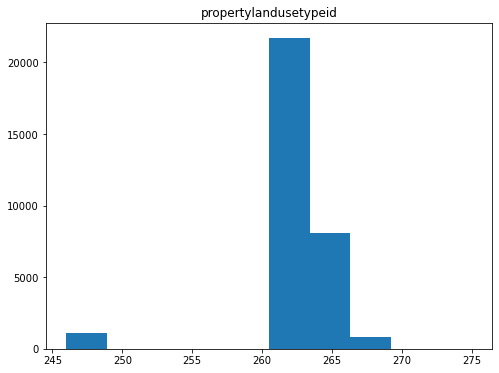

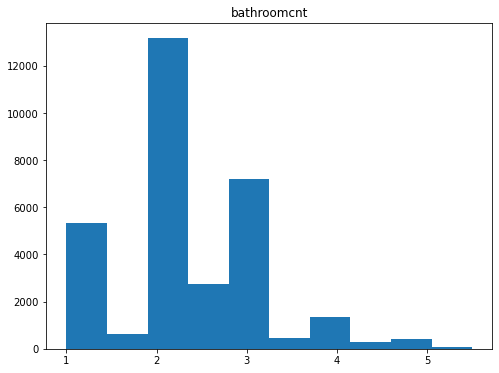

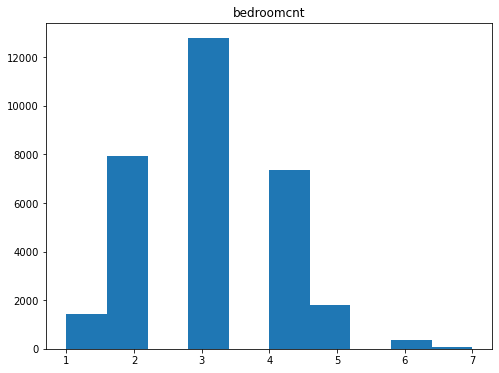

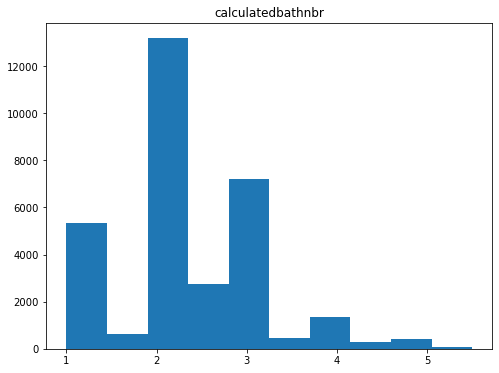

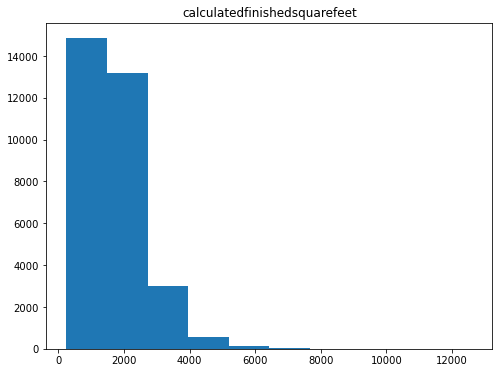

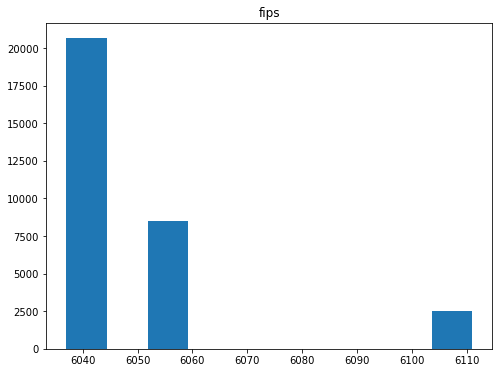

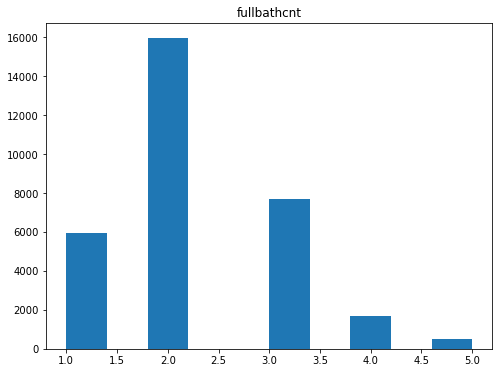

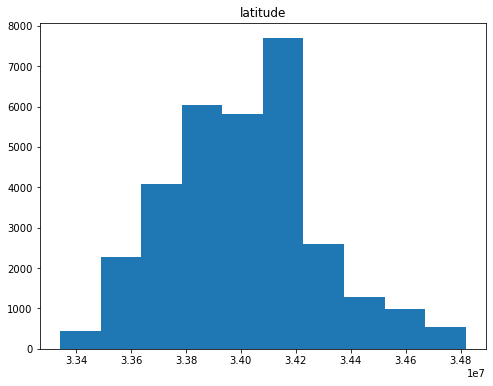

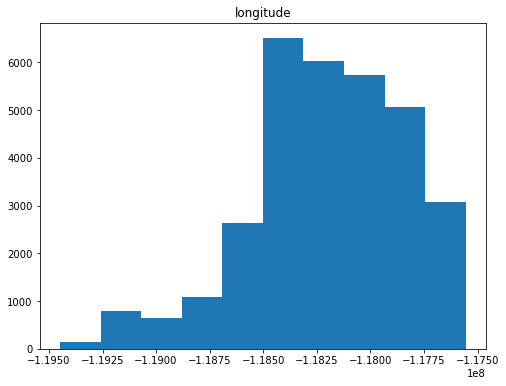

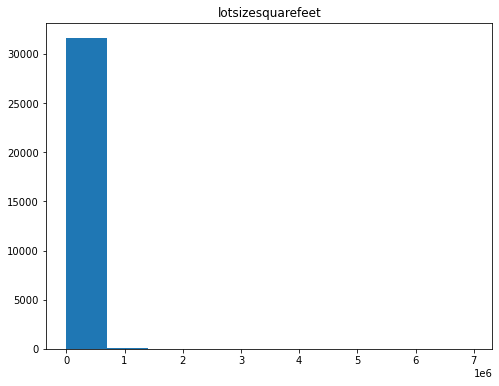

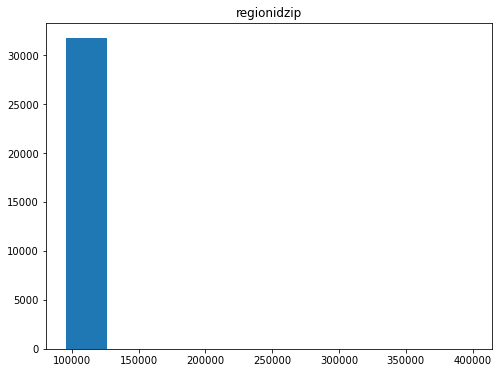

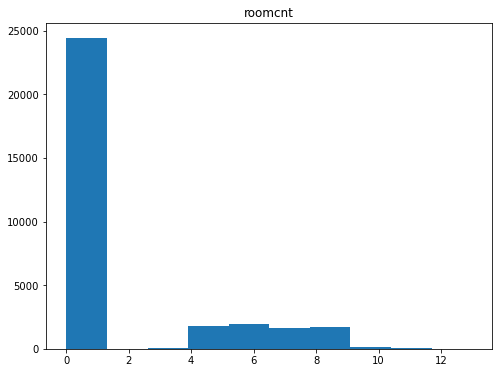

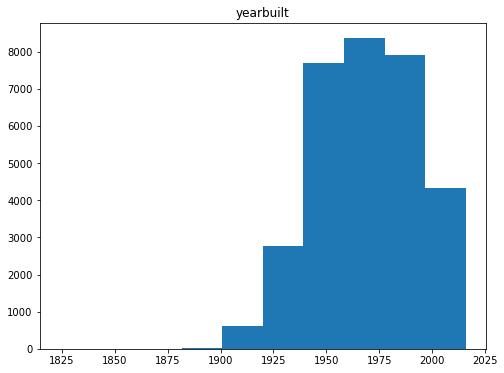

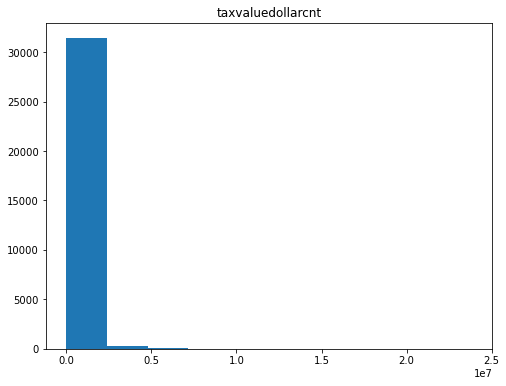

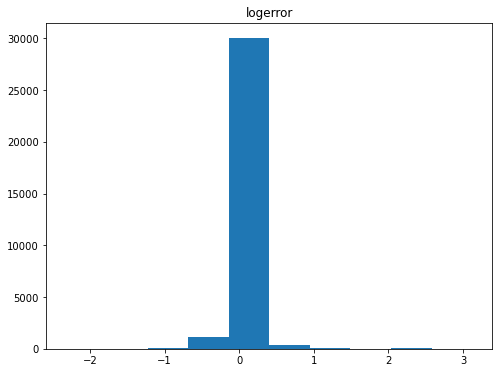

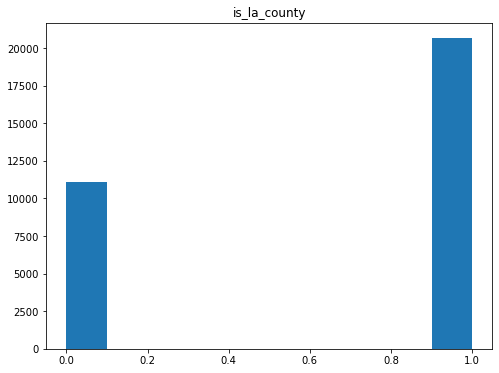

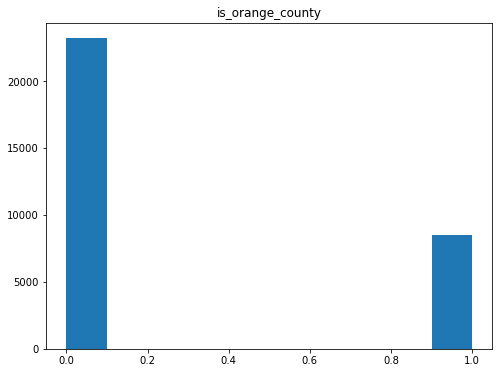

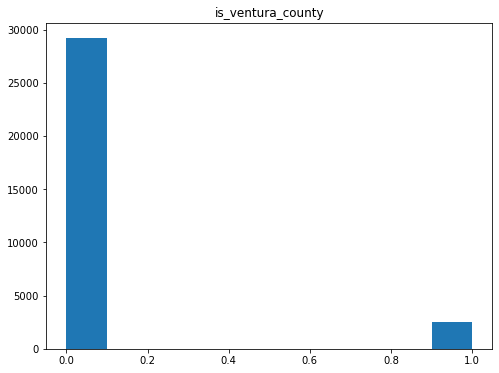

In [7]:
for column in X_train.columns:
    plt.figure(figsize=(8,6))
    plt.hist(X_train[column])
    plt.title(column)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

# Takeaways
- Log error is pretty accurate and only deviates about 2 from zero but overall very accurate.

- There are fewer outliers present after I removed houses that have more than 8 bedrooms, since the buying market is very niche at those price points.

- There are quite a lot of homes still being sold that were built before the 70's

- There also appears to be a reduction in home production in the 2000's, unsure if this was due to market crash or lack of space.

- Room count does not appear to be an accurate feature to use for our predictions

- Fips would be a good feature to cluster on, this would aide in addressing the outliers

- I still like bedroom, bathroom, full bathroom as features for my modeling. These features aided a lot in the

- Calculated bath and bedroom count is redundant info based on the histograms

In [8]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
30392,261.000000,2.000000,4.000000,2.000000,2399.000000,6059.000000,2.000000,33649079.000000,-117968922.000000,6002.000000,96964.000000,8.000000,1965.000000,461143.000000,0.007675,0,1,0
23301,261.000000,1.000000,2.000000,1.000000,990.000000,6037.000000,1.000000,34108171.000000,-118200436.000000,2402.000000,96023.000000,0.000000,1922.000000,187177.000000,-0.445277,1,0,0
45942,261.000000,2.000000,4.000000,2.000000,1992.000000,6037.000000,2.000000,34276990.000000,-118295164.000000,11047.000000,96284.000000,0.000000,1966.000000,605786.000000,-0.012347,1,0,0
43613,266.000000,4.000000,3.000000,4.000000,1969.000000,6037.000000,4.000000,33880447.000000,-118406090.000000,3334.000000,96117.000000,0.000000,1994.000000,2049072.000000,0.080601,1,0,0
64970,261.000000,1.000000,2.000000,1.000000,816.000000,6059.000000,1.000000,33838044.000000,-118043849.000000,1601.000000,96183.000000,5.000000,1970.000000,279839.000000,0.046406,0,1,0


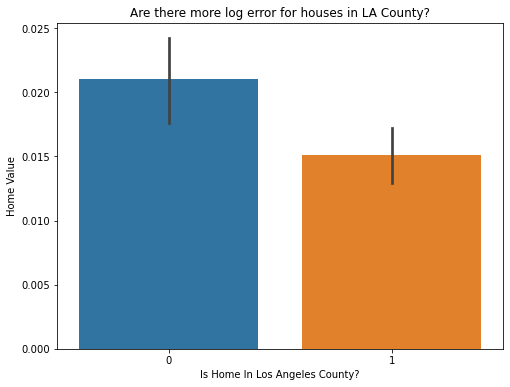

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_la_county, X_train.logerror)
plt.title("Are there more log error for houses in LA County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Los Angeles County?')
plt.show()

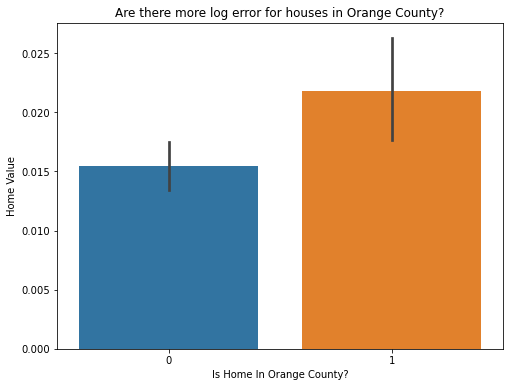

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_orange_county, X_train.logerror)
plt.title("Are there more log error for houses in Orange County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Orange County?')
plt.show()

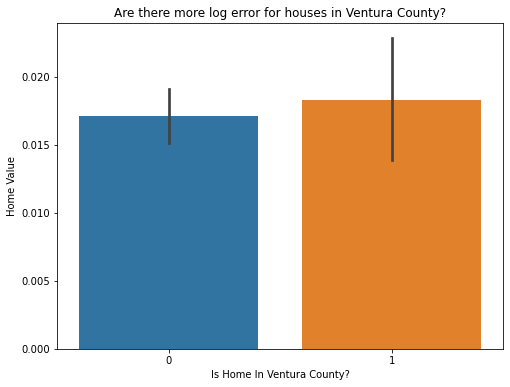

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_ventura_county, X_train.logerror)
plt.title("Are there more log error for houses in Ventura County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Ventura County?')
plt.show()

# Hypothesis Testing

### Hypothesis Test 1

$H$0 - There is no difference in log error between houses in Orange County and Los Angeles/Ventura Counties

$H$a - There is a difference between log error in Orange County and Los Angeles/Ventura Counties

In [12]:
la_county = X_train[X_train.is_la_county == 1]
not_la_county = X_train[X_train.is_la_county == 0]

stats.levene(la_county.logerror, not_la_county.logerror)

LeveneResult(statistic=30.602538043131446, pvalue=3.191754205269759e-08)

In [13]:
stats.ttest_ind(la_county.logerror, 
                not_la_county.logerror, 
                equal_var=True)

Ttest_indResult(statistic=-3.003542057549895, pvalue=0.002670647323173988)

## Conclusion
- p < alpha of .05, we reject the null hypothesis and there is a difference in log error for homes in LA county

Is There A Relationship Between Home Value And Square Feet?


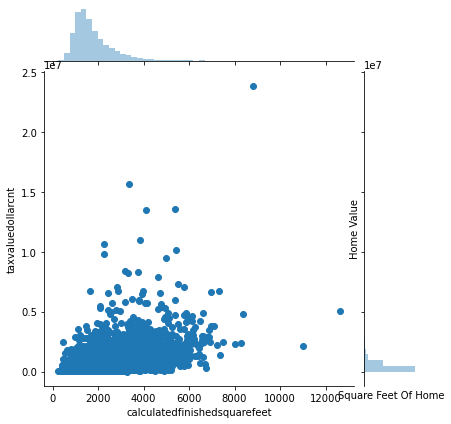

In [14]:
print('Is There A Relationship Between Home Value And Square Feet?')
sns.jointplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data=X_train)
plt.xlabel("Square Feet Of Home")
plt.ylabel("Home Value")
plt.show()

## Conclusion
- There appears to be a linear relationship between square feet of home and the value of the home
- This will be valueable when we begin our modeling and selecting best features

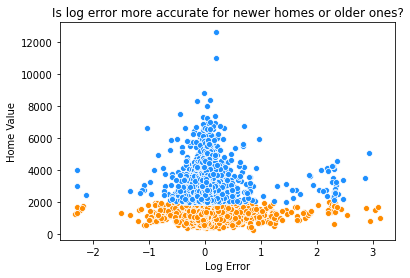

In [15]:
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet',
               data=X_train[X_train.calculatedfinishedsquarefeet<2000], color='darkorange')
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet',
               data=X_train[X_train.calculatedfinishedsquarefeet>=2000], 
                color='dodgerblue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Is log error more accurate for newer homes or older ones?")
plt.ylabel('Home Value')
plt.xlabel('Log Error')
plt.show()

## Conclusion
- It appears that most of the error occurs in the homes older than 2000
- This information will be very helpful to consider when we start assessing clusters

### Hypothesis Test 2

$H$0 - There is no difference in log error between houses with greater than 1500 square feet and houses with less than 1500 square feet.

$H$a - There is a difference in log error between houses with greater than 1500 square feet and houses with less than 1500 square feet.

In [16]:
sqft_greater_than_1500 = X_train[X_train.calculatedfinishedsquarefeet >= 1500]
sqft_less_than_1500 = X_train[X_train.calculatedfinishedsquarefeet < 1500]

stats.levene(sqft_greater_than_1500.logerror, sqft_less_than_1500.logerror)

LeveneResult(statistic=0.30922776536812535, pvalue=0.5781583683847642)

## Conclusion
- p > alpha of .05, we fail to reject the null and although the graph appears to show some correlation that log error is higher on houses that are less than 1500 sqft, it is not related.

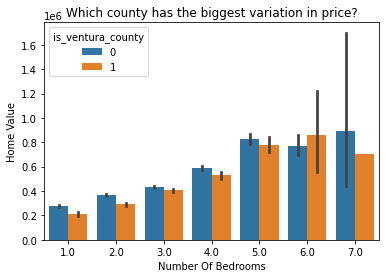

In [17]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_ventura_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

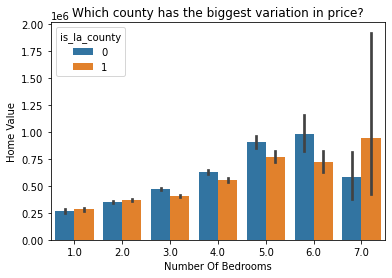

In [18]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_la_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

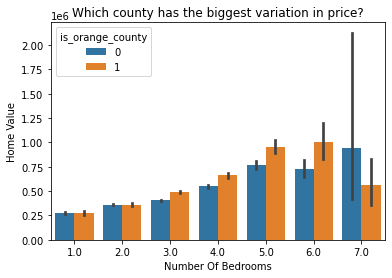

In [19]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_orange_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

## Conclusion
- The most variance in price valuation appears to be in ventura which explains why the original model was innaccurate on bigger homes
- The most consistent changes in price appears to be orange county
- The most linear prices is going to be la county which the original model preformed best on those houses last time

# Modeling

In [20]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
30392,261.000000,2.000000,4.000000,2.000000,2399.000000,6059.000000,2.000000,33649079.000000,-117968922.000000,6002.000000,96964.000000,8.000000,1965.000000,461143.000000,0.007675,0,1,0
23301,261.000000,1.000000,2.000000,1.000000,990.000000,6037.000000,1.000000,34108171.000000,-118200436.000000,2402.000000,96023.000000,0.000000,1922.000000,187177.000000,-0.445277,1,0,0
45942,261.000000,2.000000,4.000000,2.000000,1992.000000,6037.000000,2.000000,34276990.000000,-118295164.000000,11047.000000,96284.000000,0.000000,1966.000000,605786.000000,-0.012347,1,0,0
43613,266.000000,4.000000,3.000000,4.000000,1969.000000,6037.000000,4.000000,33880447.000000,-118406090.000000,3334.000000,96117.000000,0.000000,1994.000000,2049072.000000,0.080601,1,0,0
64970,261.000000,1.000000,2.000000,1.000000,816.000000,6059.000000,1.000000,33838044.000000,-118043849.000000,1601.000000,96183.000000,5.000000,1970.000000,279839.000000,0.046406,0,1,0


In [21]:
#Use the wrangle import to scale the data using the created function
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

In [22]:
#Import kmeans to create clusters on the selected features
from sklearn.cluster import KMeans
X1 = X_train_scaled[['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
                     'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt',
                     'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 
                     'taxvaluedollarcnt']]
X2 = X_validate_scaled[['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
                     'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt',
                     'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 
                     'taxvaluedollarcnt']]
X3 = X_test_scaled[['bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
                     'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt',
                     'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 
                     'taxvaluedollarcnt']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)

KMeans(n_clusters=4)

### Notes
- I selected these features based off of experience from my last project with a focus on location
- My last model did not perform on high and low valued homes due to the lack of location included in the original model
- This time I was more focused on solving that problem with my model so I clustered on location and home description features

In [23]:
pd.DataFrame(kmeans.cluster_centers_, columns=X1.columns)

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt
0,0.516613,0.444878,0.516613,0.180328,0.046684,0.572070,0.005211,0.001911,0.008696,0.808436,0.030533
1,0.164329,0.270559,0.164329,0.088371,0.049879,0.173819,0.005059,0.001474,0.003261,0.719015,0.014380
2,0.300687,0.376067,0.300687,0.133672,1.000000,0.293324,0.001987,0.003072,0.496470,0.807583,0.018785
3,0.261179,0.378994,0.261256,0.121469,0.297297,0.257319,0.001262,0.003062,0.508586,0.745327,0.018039


In [24]:
X1.shape

(31725, 11)

In [25]:
X_train_scaled['cluster'] = kmeans.predict(X1)
X_train['cluster'] = kmeans.predict(X1)
X_validate_scaled['cluster'] = kmeans.predict(X2)
X_validate['cluster'] = kmeans.predict(X2)
X_test_scaled['cluster'] = kmeans.predict(X3)
X_test['cluster'] = kmeans.predict(X3)

In [26]:
X_train.groupby('cluster').describe()

propertylandusetypeid                                            \
                        count       mean      std        min        25%   
cluster                                                                   
0                 8457.000000 261.914982 4.825795 246.000000 261.000000   
1                16255.000000 262.102307 3.778121 246.000000 261.000000   
2                 2539.000000 262.413549 2.404502 246.000000 261.000000   
3                 4474.000000 261.473402 1.523886 246.000000 261.000000   

                                          bathroomcnt                    \
               50%        75%        max        count     mean      std   
cluster                                                                   
0       261.000000 266.000000 269.000000  8457.000000 3.324761 0.598286   
1       261.000000 266.000000 269.000000 16255.000000 1.739465 0.502555   
2       261.000000 265.000000 275.000000  2539.000000 2.353092 0.800833   
3       261.000000 261.000000 266.000000  4474.000000 2.175458 0.549224   

                                                       bedroomcnt           \
             min      25%      50%      75%      max        count     mean   
cluster                                                                      
0       2.500000 3.000000 3.000000 3.500000 5.500000  8457.000000 3.669268   
1       1.000000 1.000000 2.000000 2.000000 2.500000 16255.000000 2.623316   
2       1.000000 2.000000 2.000000 2.500000 5.500000  2539.000000 3.256400   
3       1.000000 2.000000 2.000000 2.500000 4.500000  4474.000000 3.274251   

                                                               \
             std      min      25%      50%      75%      max   
cluster                                                         
0       1.012221 1.000000 3.000000 4.000000 4.000000 7.000000   
1       0.852856 1.000000 2.000000 3.000000 3.000000 7.000000   
2       0.938218 1.000000 3.000000 3.000000 4.000000 7.000000   
3       0.831755 1.000000 3.000000 3.000000 4.000000 7.000000   

        calculatedbathnbr                                               \
                    count     mean      std      min      25%      50%   
cluster                                                                  
0             8457.000000 3.324761 0.598286 2.500000 3.000000 3.000000   
1            16255.000000 1.739465 0.502555 1.000000 1.000000 2.000000   
2             2539.000000 2.353092 0.800833 1.000000 2.000000 2.000000   
3             4474.000000 2.175801 0.548870 1.000000 2.000000 2.000000   

                          calculatedfinishedsquarefeet                         \
             75%      max                        count        mean        std   
cluster                                                                         
0       3.500000 5.500000                  8457.000000 2473.377675 953.062775   
1       2.000000 2.500000                 16255.000000 1335.470098 439.777927   
2       2.500000 5.500000                  2539.000000 1896.051682 885.184385   
3       2.500000 4.500000                  4474.000000 1745.257859 618.510201   

                                                                     \
               min         25%         50%         75%          max   
cluster                                                               
0       810.000000 1769.000000 2304.000000 2980.000000 12616.000000   
1       242.000000 1027.000000 1273.000000 1583.000000  5315.000000   
2       480.000000 1270.000000 1671.000000 2277.000000  7223.000000   
3       667.000000 1277.500000 1595.500000 2084.750000  5243.000000   

                fips                                                           \
               count        mean      std         min         25%         50%   
cluster                                                                         
0        8457.000000 6040.454653 8.004706 6037.000000 6037.000000 6037.000000   
1       16255.000000 6040.692156 8.221896 60

In [27]:
X_train_scaled.groupby('cluster').size()

cluster
0     8457
1    16255
2     2539
3     4474
dtype: int64

[Text(0, 0.5, 'Square Footage Of Home'), Text(0.5, 0, 'Log Error')]

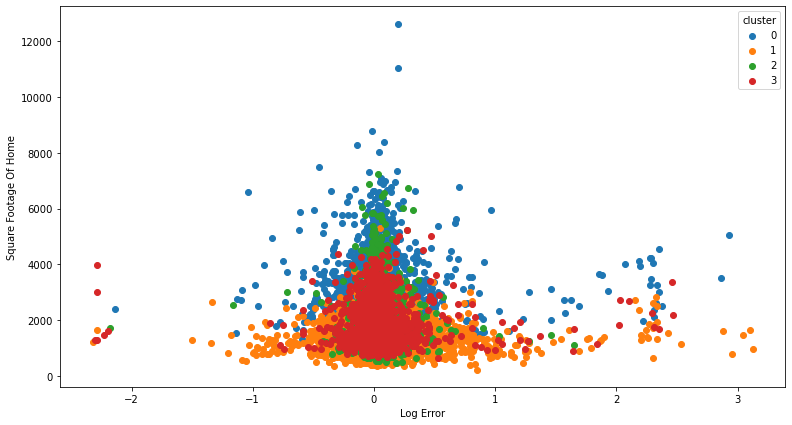

In [28]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('cluster'):
    ax.scatter(subset.logerror, subset.calculatedfinishedsquarefeet, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Square Footage Of Home', xlabel='Log Error')


# Takeaways
- It seems that the log error is evenly distributed amongst all the square footages of the homes
- There may not be much to focus on related to square footage

In [29]:
kmeans.inertia_

3280.656559304182

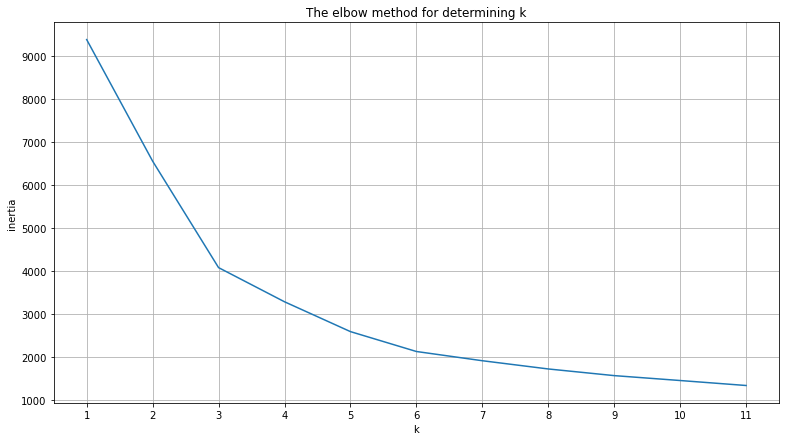

In [30]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X1)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

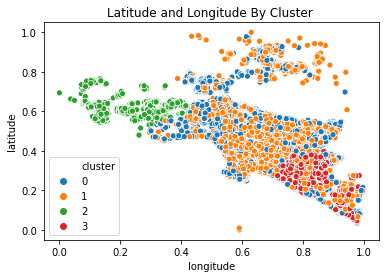

In [31]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=X_train_scaled, palette='tab10')
plt.title("Latitude and Longitude By Cluster ")
plt.show()

# Takeaways
- The clusters are doing a good job of showing me the distribution of the difference houses based on key features and location

- Now that I can visualize were these the way these homes are distributed, I can come up with a better idea of how to address the outliers

- Cluster 2 contains all the higher valued homes in the area, so with this filter added, we can see that there is a lot of overlap in Orange county that is causing all the varience.

- This means that location does matter as there are different variations in home value throughout various areas in LA and Orange county.

Text(0.5, 1.0, 'Year Built vs Log Error By Clusters')

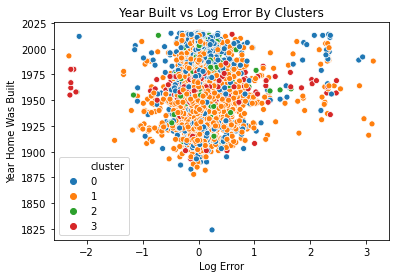

In [32]:
sns.scatterplot(x='logerror', y='yearbuilt', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Year Home Was Built')
plt.xlabel('Log Error')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Year Built vs Log Error By Clusters')

# Takeaways
- This did not provide any additional clarity in regards to year built. It appears that there are high valued homes (green) scattered throughout all the data.

- Not a waste of efforts but it does show that the high prices homes are scattered throughout the years built

In [33]:
X4 = X_train_scaled[['fips', 'taxvaluedollarcnt','regionidzip']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X4)

KMeans(n_clusters=2)

In [34]:
pd.DataFrame(kmeans.cluster_centers_, columns=X4.columns)

,fips,taxvaluedollarcnt,regionidzip
0,0.086889,0.019622,0.001844
1,1.000000,0.018785,0.003072


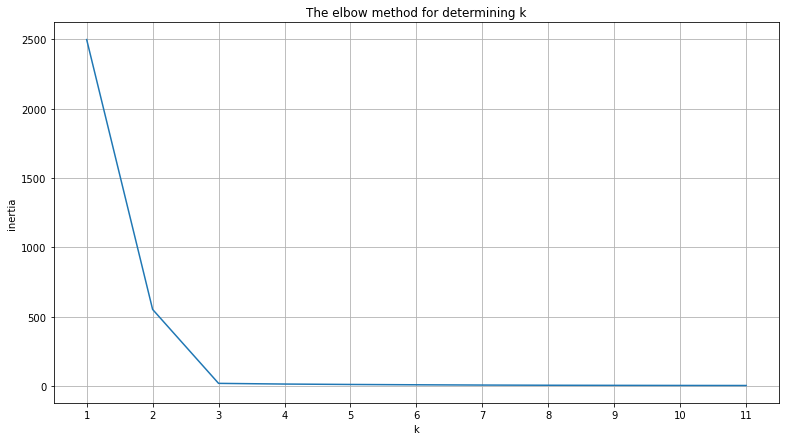

In [35]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X4)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

Text(0.5, 1.0, 'Fips vs Log Error By Clusters')

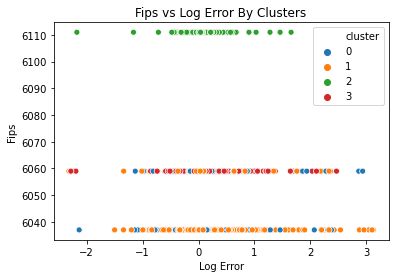

In [36]:
sns.scatterplot(x='logerror', y='fips', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Fips')
plt.xlabel('Log Error')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Fips vs Log Error By Clusters')

In [37]:
X5 = X_train_scaled[['fips', 'taxvaluedollarcnt','bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X5)

KMeans(n_clusters=3)

In [38]:
pd.DataFrame(kmeans.cluster_centers_, columns=X5.columns)

,fips,taxvaluedollarcnt,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet
0,0.072678,0.014375,0.166219,0.232252,0.083309
1,0.105664,0.026554,0.433240,0.477003,0.168687
2,1.000000,0.018785,0.300687,0.376067,0.133672


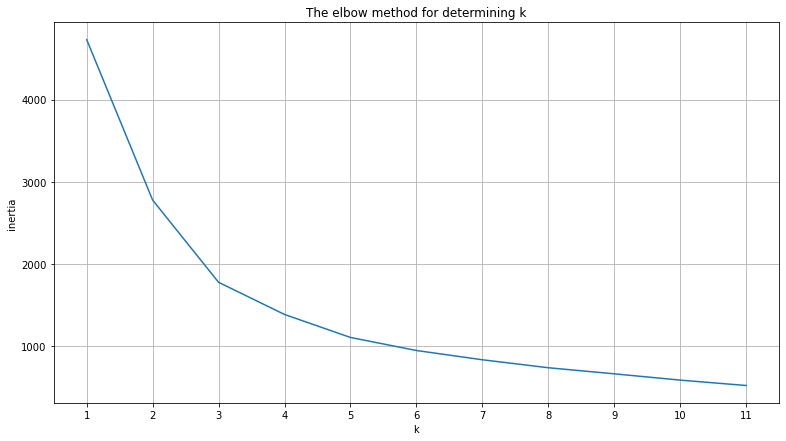

In [39]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X5)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

Text(0.5, 1.0, 'Number of Bedrooms vs Log Error By Clusters')

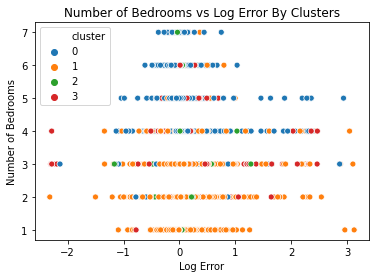

In [70]:
sns.scatterplot(x='logerror', y='bedroomcnt', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Number of Bedrooms')
plt.xlabel('Log Error')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Number of Bedrooms vs Log Error By Clusters')

# Cluster Conclusion
- Clustering was very helpful in understanding the data even better to more accurate select the features for my models.

- The last go around, I was missing an x factor that would make my predictions almost perfect, but clustering helped find that x factor.

- Now I wil include the cluster column and run it through the RFE to see if it improves the model or not.

In [41]:
X_train_scaled.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,cluster
30392,0.517241,0.222222,0.500000,0.222222,0.174317,0.297297,0.250000,0.208356,0.781236,0.000799,0.003234,0.615385,0.734375,0.019287,3
23301,0.517241,0.000000,0.166667,0.000000,0.060449,0.000000,0.000000,0.519069,0.658985,0.000282,0.000135,0.000000,0.510417,0.007804,1
45942,0.517241,0.222222,0.500000,0.222222,0.141426,0.000000,0.250000,0.633326,0.608963,0.001522,0.000994,0.000000,0.739583,0.025350,1
43613,0.689655,0.666667,0.333333,0.666667,0.139567,0.000000,0.750000,0.364946,0.550389,0.000416,0.000445,0.000000,0.885417,0.085846,0
64970,0.517241,0.000000,0.166667,0.000000,0.046388,0.297297,0.000000,0.336247,0.741671,0.000167,0.000662,0.384615,0.760417,0.011688,3


# Feature Engineering

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 5)
lm_X_rfe_train = rfe.fit_transform(X_train_scaled,y_train)
lm_X_rfe_val = rfe.fit_transform(X_validate_scaled,y_validate)
lm_X_rfe_test = rfe.fit_transform(X_test_scaled,y_test)

In [44]:
## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 5 features: bathroomcnt, calculatedbathnbr, calculatedfinishedsquarefeet, lotsizesquarefeet, taxvaluedollarcnt


# Takeaway
- At this point, clustering was not good enought to improve my model but in clustering as part of my explore phase, I included features in the my models this time around that I did not include the first time because I didn't feel they were relevant.

- With these additional features, the RFE actually returned features that I did not use before that would be considered better to accuractely predict with.

# Train Linear Regression Model

In [45]:
# Fit the model to the train dataset
lm.fit(lm_X_rfe_train, y_train)

LinearRegression()

In [46]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [0.00551802]
features:  Index(['bathroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'taxvaluedollarcnt'],
      dtype='object')
coefficients:  [[ 0.42661848 -0.43432515  0.15032883  0.13924665 -0.2542502 ]]


In [47]:
## Here we're going to add a column that will make log error predictions using the linear model
y_train['yhat_lm'] = lm.predict(lm_X_rfe_train)

y_train.head()

,logerror,yhat_lm
30392,0.007675,0.025218
23301,-0.445277,0.012660
45942,-0.012347,0.018832
43613,0.080601,-0.000407
64970,0.046406,0.009543


In [48]:
## Checking the mean squared error of the model
RMSE_lm = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_lm))
RMSE_lm

0.1658503274530177

In [49]:
r2_lm = lm.score(lm_X_rfe_train, y_train.logerror)
r2_lm

0.002315901585166591

# Validate Linear Regression Model

In [50]:
lm.fit(lm_X_rfe_val, y_validate)

LinearRegression()

In [51]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [0.00289995]
features:  Index(['bathroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'lotsizesquarefeet', 'taxvaluedollarcnt'],
      dtype='object')
coefficients:  [[-0.1913089   0.1840531   0.15768229  0.08749797 -0.27700793]]


In [52]:
## Here we're going to add a column that will make log error predictions on the validate dataset using the linear model
y_validate['yhat_lm'] = lm.predict(lm_X_rfe_val)

y_validate.head()

,logerror,yhat_lm
69236,-0.014323,0.011961
69223,0.015813,0.003200
1890,-0.093132,0.016664
35365,-0.032451,0.015544
11597,-0.018133,0.014729


0.16325414153254536
0.0


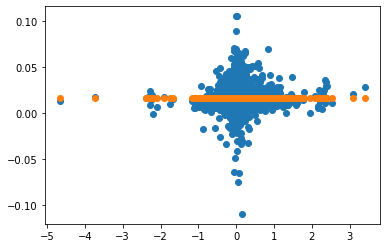

In [53]:
y_validate['yhat_baseline'] = df['logerror'].mean()

# compute the RMSE
RMSE_bl = np.sqrt(mean_squared_error(y_validate.logerror, y_validate.yhat_baseline))
print(RMSE_bl)

# no need to compute R-2 because it will be a 0! But we will demonstrate here:
evs = explained_variance_score(y_validate.logerror, y_validate.yhat_baseline)
print(evs)
plt.scatter(y_validate.logerror, y_validate.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

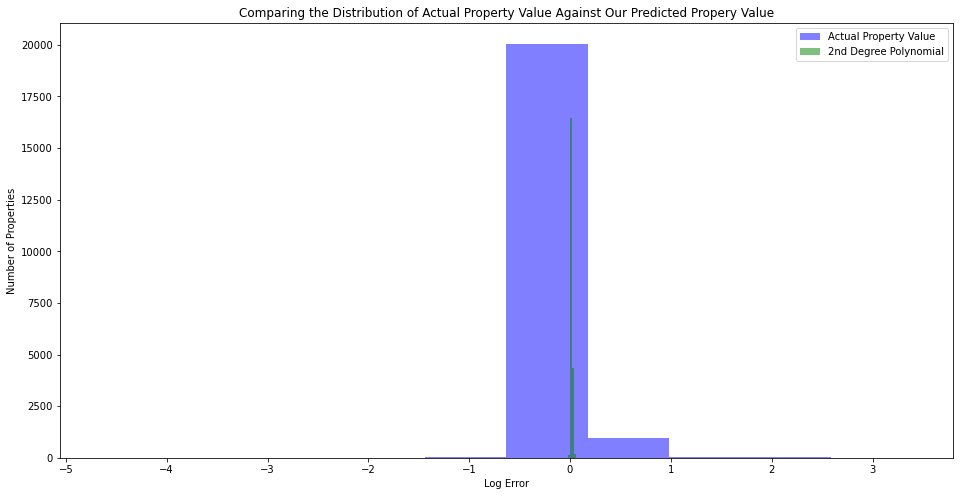

In [54]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_validate.yhat_lm, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Log Error")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

## Takeaways
- The linear regression model isn't a bad starting point and stayed relatively close to the log error
- Somewhat better than baseline but we can definitely do better

# 4th Degree Polynomial Model

In [55]:
from sklearn.preprocessing import PolynomialFeatures
# fitting the train, validate, and test dataset
poly_X_rfe_train = rfe.fit_transform(X_train, y_train)
poly_X_rfe_val = rfe.transform(X_validate)
poly_X_rfe_test = rfe.transform(X_test)

# selecting the degree we would like to polynomaial to assess
pf_4 = PolynomialFeatures(degree=4)

# fit and transform X_train_scaled
X_train_degree4 = pf_4.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree4 = pf_4.transform(poly_X_rfe_val)
X_test_degree4 = pf_4.transform(poly_X_rfe_test)

In [56]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree4, y_train.logerror)

# predict train
y_train['yhat_poly_1'] = lm2.predict(X_train_degree4)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.yhat_poly_1)**1/2

# predict validate
y_validate['yhat_poly_1'] = lm2.predict(X_validate_degree4)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.yhat_poly_1)**1/2

print("RMSE for Polynomial Model, degrees=4\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=4
Training/In-Sample:  0.000000000000000000000000000000158 
Validation/Out-of-Sample:  0.000000000000000574963628354314781


# Conclusions
- So far the model is looking pretty decent but I feel like we can still do better so I'm going to continue working on improving this model by adjusting the degrees

- This is a very good starting point considering how low the mean square error is from one data set to another

- With the jump from train to validate being noticable, I'm going to have to tweak the degrees to see if that improves anything

# 3rd Degree Polynomial Model

In [57]:
# make the polynomial features to get a new set of features
pf_3 = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
X_train_degree3 = pf_3.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree3 = pf_3.transform(poly_X_rfe_val)
X_test_degree3 = pf_3.transform(poly_X_rfe_test)

In [58]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree3, y_train.logerror)

# predict train
y_train['yhat_poly_2'] = lm2.predict(X_train_degree3)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.yhat_poly_2)**1/2

# predict validate
y_validate['yhat_poly_2'] = lm2.predict(X_validate_degree3)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.yhat_poly_2)**1/2

print("RMSE for Polynomial Model, degrees=3\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=3
Training/In-Sample:  0.000000000000000000000000000000861 
Validation/Out-of-Sample:  0.000000000000024306083085182712969


# Conclusions
- This was a slight improvement from the last model so maybe going down one more degree will assist in verifying the best model to use on this data set for log error

- I'm definitely satisfied with the results and hope that 2 degrees will do the trick

# 2nd Degree Polynomial Model

In [59]:
# make the polynomial features to get a new set of features
pf_2 = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf_2.fit_transform(poly_X_rfe_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf_2.transform(poly_X_rfe_val)
X_test_degree2 = pf_2.transform(poly_X_rfe_test)

In [60]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['yhat_poly_3'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.yhat_poly_3)**1/2

# predict validate
y_validate['yhat_poly_3'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.yhat_poly_3)**1/2

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", '{:.33f}'.format(rmse_train), 
      "\nValidation/Out-of-Sample: ", '{:.33f}'.format(rmse_validate))

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.000000000000000000000000000000132 
Validation/Out-of-Sample:  0.000000000000000000000000000000123


# Conclusions
- It definitely looks like we have a winner for MVP, not only did the rmse improve, but it was even slightly better than on validate than it was on train

- This is going to be my MVP

In [61]:
y_validate.head()

,logerror,yhat_lm,yhat_baseline,yhat_poly_1,yhat_poly_2,yhat_poly_3
69236,-0.014323,0.011961,0.016213,-0.014323,-0.014323,-0.014323
69223,0.015813,0.003200,0.016213,0.015813,0.015813,0.015813
1890,-0.093132,0.016664,0.016213,-0.093132,-0.093132,-0.093132
35365,-0.032451,0.015544,0.016213,-0.032451,-0.032451,-0.032451
11597,-0.018133,0.014729,0.016213,-0.018133,-0.018133,-0.018133


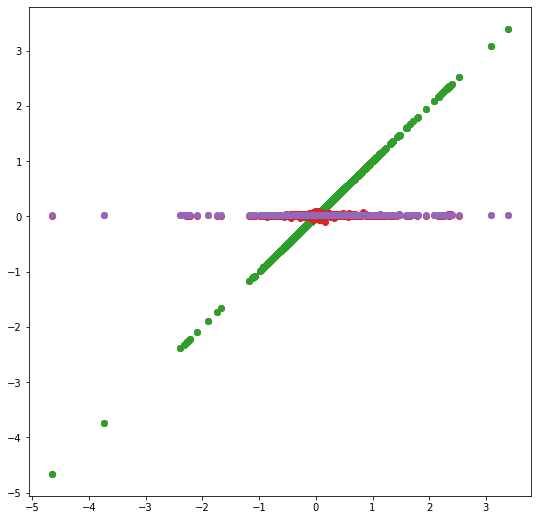

In [62]:
plt.figure(figsize=(9, 9))
plt.scatter(y_validate.logerror, y_validate.yhat_poly_1, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_poly_2, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_poly_3, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

# Takeaways
- Based on this chart above, I was able to deduct that my linear regression model was pretty close but it looks like all the polynomial models are almost perfectly along the 45 degree line!

- Now that we have a solid model, we can graph it against the actual data to see how good it did.

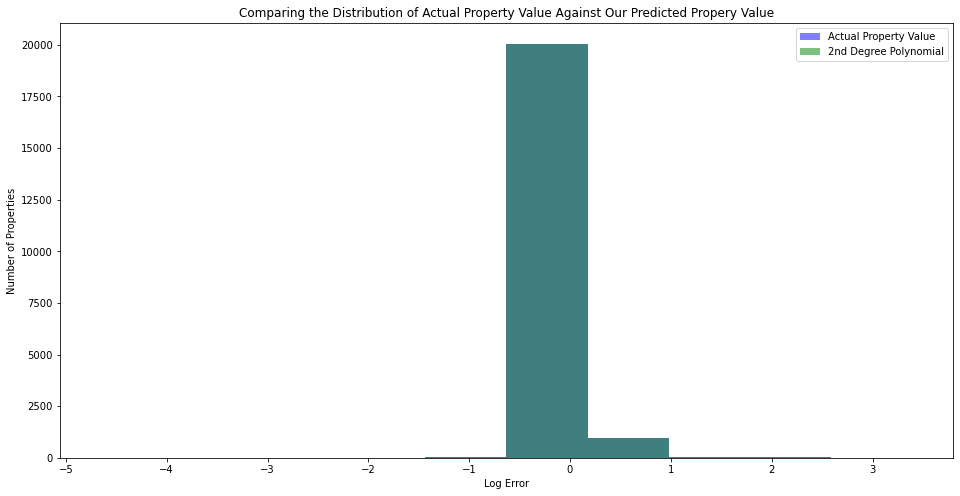

In [63]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_validate.yhat_poly_3, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Log Error")
plt.ylabel("Number of Properties")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

# Conclusion
- We most definitely have an MVP at this point, it almost perfectly predicted all the actual points based on the features I ran through polynomial this time.


# MVP

In [64]:
# predict validate
y_test['yhat_poly'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.logerror, y_test.yhat_poly)**1/2

print("RMSE for Polynomial Model, degrees=2\nValidation/Out-Of-Sample: ", '{:.33f}'.format(rmse_validate), 
      "\nTest/Out-of-Sample: ", '{:.33f}'.format(rmse_test))

RMSE for Polynomial Model, degrees=2
Validation/Out-Of-Sample:  0.000000000000000000000000000000123 
Test/Out-of-Sample:  0.000000000000000000000000000000173


In [65]:
y_test.head()

,logerror,yhat_poly
28233,-0.055510,-0.055510
48250,0.002652,0.002652
24164,0.027435,0.027435
48666,-0.000122,-0.000122
42343,0.178914,0.178914


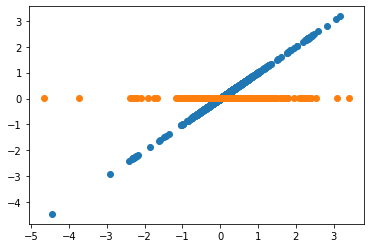

In [66]:
plt.scatter(y_test.logerror, y_test.yhat_poly, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_baseline, label='Baseline Predicitions', marker='o')

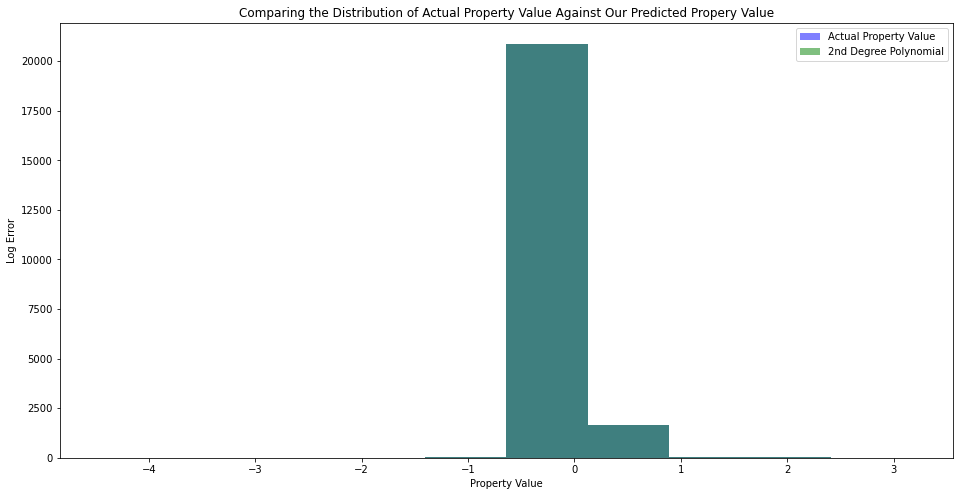

In [67]:
# plot to visualize actual vs predicted. 
plt.figure(figsize=(16,8))
plt.hist(y_test.logerror, color='blue', alpha=.5, label="Actual Property Value")
plt.hist(y_test.yhat_poly, color='green', alpha=.5, label="2nd Degree Polynomial")
plt.xlabel("Property Value")
plt.ylabel("Log Error")
plt.title("Comparing the Distribution of Actual Property Value Against Our Predicted Propery Value")
plt.legend()
plt.show()

In [68]:
y_test['perc_error'] = ((y_test.logerror - y_test.yhat_poly) / y_test.logerror) * 100
y_test

,logerror,yhat_poly,perc_error
28233,-0.055510,-0.055510,0.000000
48250,0.002652,0.002652,-0.000000
24164,0.027435,0.027435,-0.000000
48666,-0.000122,-0.000122,0.000000
42343,0.178914,0.178914,0.000000
...,...,...,...
15070,0.011109,0.011109,-0.000000
54392,0.103840,0.103840,0.000000
44488,-0.044679,-0.044679,0.000000
57192,0.018937,0.018937,0.000000


In [69]:
print('The MVP Model was, ''{:.33f}'.format(y_test.perc_error.sum()), '% off actual')

The MVP Model was, -0.000000009240225267614809680615114 % off actual


# Final Thoughts
- The MVP not only met expectations on the test data, but it exceeded it!
- It was so accurate that it was only a fraction off of the actual points, which means we have a very solid model that we can use on future data
- Moving forward, we can assess the features that produced this model to get a better understanding of what truly drives home value.